In [27]:
import pandas as pd 
import numpy as np 
from loguru import logger 
from matplotlib import pyplot as plt
import rasterio
import os 
import geopandas as gpd


In [2]:
imgs_dir = "/project/pi_cjgleason_umass_edu/swot_planet/unit/"
ref_df_fp = "/project/pi_cjgleason_umass_edu/swot_planet/yukon_imgs.csv"

In [ ]:
ref_df = pd.read_csv(ref_df_fp)

In [34]:
ref_df.shape

(12221, 5)

<Axes: >

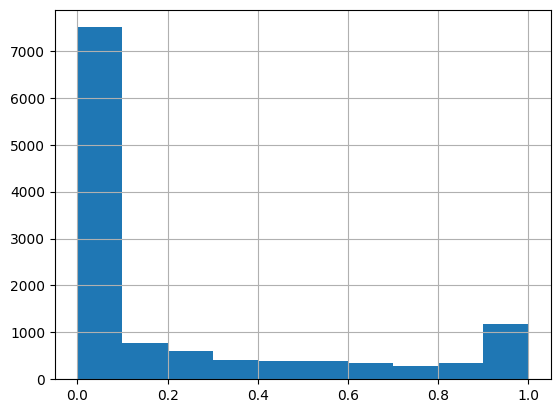

In [33]:
ref_df["planet_cloud_cover"].hist()

In [10]:
def normalize_bands(rgb_data):
    for b_num in range(rgb_data.shape[-1]):
        rgb_data[:,:,b_num] = (rgb_data[:,:,b_num] - np.min(rgb_data[:,:,b_num]))/(np.max(rgb_data[:,:,b_num])-np.min(rgb_data[:,:,b_num]))
    return rgb_data

In [15]:
data = rasterio.open(ref_df["planet_dir"].iloc[0]).read()
rgb_data = np.transpose(data, (1,2,0))[:,:,:3]
# rgb_data = normalize_bands(rgb_data)
rgb_data = (rgb_data-np.min(rgb_data))/(np.max(rgb_data)-np.min(rgb_data))
data.shape, rgb_data.shape

((4, 4606, 1036), (4606, 1036, 3))

In [16]:
np.sum(data)

18637111292

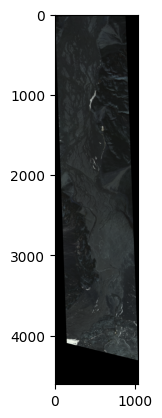

In [17]:
plt.imshow(rgb_data)

In [ ]:
folder_path = "--".join(ref_df["planet_dir"].iloc[0].split("/")[-4:])
folder_path = folder_path.replace(".tif","")    # path for saving 500x500 tiles for segmentation
folder_path

'81292900261.0--a280e34e-268f-41d4-85e8-773c7b38b9c9--PSScene--20240429_203812_47_24f1_3B_AnalyticMS_SR_clip'

In [4]:
ref_df["reach_id"].value_counts()

reach_id
8.126030e+10    95
8.125080e+10    91
8.125070e+10    88
8.122060e+10    87
8.125070e+10    86
                ..
8.125080e+10     3
8.122010e+10     2
8.129440e+10     2
8.121050e+10     1
8.121080e+10     1
Name: count, Length: 321, dtype: int64

In [ ]:
# get corresponding SWORD file from reach_id
fp = "/nas/cee-water/cjgleason/jonathan/data/sword.shp" # SWORDv17
sword = gpd.read_file(fp)   # 248647

In [29]:
sword.shape

(248647, 37)

In [31]:
sword["reach_id"].value_counts()

reach_id
24221000325    1
85100000021    1
85100000031    1
85100000061    1
85100000071    1
              ..
85104000031    1
85104000041    1
85104000051    1
85104000061    1
85104000071    1
Name: count, Length: 248647, dtype: int64

In [ ]:
all_sword_filtered = sword[["x","y",'reach_id', 'reach_len']]

Index(['x', 'y', 'reach_id', 'reach_len', 'n_nodes', 'wse', 'wse_var', 'width',
       'width_var', 'facc', 'n_chan_max', 'n_chan_mod', 'obstr_type',
       'grod_id', 'hfalls_id', 'slope', 'dist_out', 'lakeflag', 'max_width',
       'n_rch_up', 'n_rch_dn', 'rch_id_up', 'rch_id_dn', 'swot_orbit',
       'swot_obs', 'type', 'river_name', 'edit_flag', 'trib_flag', 'path_freq',
       'path_order', 'path_segs', 'main_side', 'strm_order', 'end_reach',
       'network', 'geometry'],
      dtype='object')

In [35]:
fp = "/scratch3/workspace/rdaroya_umass_edu-water/river-width-planet-global/tiled_planet/81210100041.0--23810af8-d590-44e5-8d82-401a7170e44f--PSScene--20240408_213204_63_24c0_3B_AnalyticMS_SR_clip/tile_0_500-0-500.tif"
data = rasterio.open(fp).read()
data.shape

(4, 500, 500)